In [25]:
!pip install matplotlib==3.1.3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
pd.set_option('display.max_columns', None)
from fbprophet import Prophet

In [26]:
df = pd.read_csv("Electric Car Sales by Model in USA-CLEANED.csv")

In [27]:
df = df.fillna(0)

In [28]:
df = df.drop('Logo', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [29]:

df["May 2019"]=df["May 2019"].str.replace('[,]', '')
df["June 2019"]=df["June 2019"].str.replace('[,]', '')
df["July 2019"]=df["July 2019"].str.replace('[,]', '')
df["Aug 2019"]=df["Aug 2019"].str.replace('[,]', '')
df["September 2019"]=df["September 2019"].str.replace('[,]', '')
df["October 2019"]=df["October 2019"].str.replace('[,]', '')
df["November 2019"]=df["November 2019"].str.replace('[,]', '')
df["Dec 2019"]=df["Dec 2019"].str.replace('[,]', '')
df["May 2019"]=df["May 2019"].fillna(0)
df["May 2019"]=df["May 2019"].astype(int)
df["June 2019"] = pd.to_numeric(df['June 2019'], errors='coerce')
df["June 2019"]=df["June 2019"].fillna(0)
df["June 2019"]=df["June 2019"].astype(int)
df["July 2019"] = pd.to_numeric(df['July 2019'], errors='coerce')
df["July 2019"]=df["July 2019"].fillna(0)
df["July 2019"]=df["July 2019"].astype(int)
df["Aug 2019"] = pd.to_numeric(df['Aug 2019'], errors='coerce')
df["Aug 2019"]=df["Aug 2019"].fillna(0)
df["Aug 2019"]=df["Aug 2019"].astype(int)
df["September 2019"] = pd.to_numeric(df['September 2019'], errors='coerce')
df["September 2019"]=df["September 2019"].fillna(0)
df["September 2019"]=df["September 2019"].astype(int)
df["October 2019"] = pd.to_numeric(df['October 2019'], errors='coerce')
df["October 2019"]=df["October 2019"].fillna(0)
df["October 2019"]=df["October 2019"].astype(int)
df["November 2019"] = pd.to_numeric(df['November 2019'], errors='coerce')
df["November 2019"]=df["November 2019"].fillna(0)
df["November 2019"]=df["November 2019"].astype(int)
df["Dec 2019"] = pd.to_numeric(df['Dec 2019'], errors='coerce')
df["Dec 2019"]=df["Dec 2019"].fillna(0)
df["Dec 2019"]=df["Dec 2019"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarnin

In [30]:
df.head()

,Make,Model,Jan 2012,Feb 2012,March 2012,Apr 2012,May 2012,June 2012,July 2012,Aug 2012,September 2012,October 2012,November 2012,Dec 2012,January 2013,Feb 2013,March 2013,Apr 2013,May 2013,June 2013,July 2013,Aug 2013,September 2013,October 2013,November 2013,Dec 2013,January 2014,Feb 2014,March 2014,Apr 2014,May 2014,June 2014,July 2014,Aug 2014,September 2014,October 2014,November 2014,Dec 2014,January 2015,Feb 2015,March 2015,Apr 2015,May 2015,June 2015,July 2015,Aug 2015,September 2015,October 2015,November 2015,Dec 2015,January 2016,Feb 2016,March 2016,Apr 2016,May 2016,June 2016,July 2016,Aug 2016,September 2016,October 2016,November 2016,Dec 2016,January 2017,Feb 2017,March 2017,Apr 2017,May 2017,June 2017,July 2017,Aug 2017,September 2017,October 2017,November 2017,Dec 2017,January 2018,Feb 2018,March 2018,Apr 2018,May 2018,June 2018,July 2018,Aug 2018,September 2018,October 2018,November 2018,Dec 2018,January 2019,Feb 2019,March 2019,Apr 2019,May 2019,June 2019,July 2019,Aug 2019,September 2019,October 2019,November 2019,Dec 2019
0,Chevrolet,Volt,603.0,1626.0,3915.0,5377.0,7057.0,8817.0,10666.0,13497.0,16348.0,19309.0,20828.0,23461.0,24601.0,26227.0,27705.0,29011.0,30618.0,33316.0,35104.0,38455.0,40221.0,42243.0,44163.0,46555.0,47473.0,48683.0,50161.0,51709.0,53393.0,55170.0,57190.0,59701.0,61095.0,62534.0,63870.0,65360.0,65902.0,66595.0,67234.0,68139.0,69757.0,70982.0,72295.0,73675.0,74624.0,76659.0,78639.0,80753.0,81749.0,82875.0,84740.0,86723.0,88624.0,90561.0,92967.0,95048.0,97079.0,99270.0,101801.0,105492.0,107103.0,108923.0,111055.0,112862.0,114679.0,116424.0,117942.0,119387.0,120840.0,122202.0,123904.0,125841.0,126554.0,127537.0,129319.0,130644.0,132319.0,133655.0,135130.0,136955.0,139084.0,140559.0,143089.0,144147.0,144822.0,145437.0,146667.0,147072.0,14748,147813,148063,148337,148687,148757,148907,149057
1,Toyota,Prius PHV,0.0,21.0,912.0,2566.0,3652.0,4347.0,5035.0,6082.0,7734.0,9623.0,11389.0,12750.0,13624.0,14317.0,15103.0,15702.0,16380.0,16964.0,17781.0,19572.0,20724.0,22819.0,23919.0,24838.0,25641.0,26682.0,28134.0,29875.0,32567.0,34138.0,35509.0,36327.0,36680.0,37159.0,37610.0,38102.0,38503.0,38900.0,39373.0,39801.0,40528.0,40992.0,41576.0,41920.0,42136.0,42227.0,42271.0,42293.0,42303.0,42309.0,42316.0,42320.0,42324.0,42335.0,42339.0,42341.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345,42345,42345,42345,42345,42345,42345,42345
2,Nissan,Leaf,676.0,1154.0,1733.0,2103.0,2613.0,3148.0,3543.0,4228.0,5212.0,6791.0,8330.0,9819.0,10469.0,11122.0,13358.0,15295.0,17433.0,19658.0,21522.0,23942.0,25895.0,27897.0,29900.0,32429.0,33681.0,35106.0,37613.0,39701.0,42818.0,45165.0,48184.0,51370.0,54251.0,56840.0,59527.0,62629.0,63699.0,64897.0,66714.0,68267.0,70371.0,72445.0,73619.0,75012.0,76259.0,77497.0,78551.0,79898.0,80653.0,81583.0,82829.0,83616.0,84595.0,85691.0,86754.0,87820.0,89136.0,90548.0,92005.0,93904.0,94676.0,95713.0,97191.0,98254.0,99646.0,101152.0,102435.0,103589.0,104644.0,104857.0,105032.0,105134.0,105284.0,106179.0,107679.0,108850.0,110426.0,111793.0,112942.0,114257.0,115820.0,117054.0,118182.0,119849.0,120566.0,121220.0,122534.0,123485.0,124701,125857,126795,127912,12896,129847,130987,132214
3,Tesla,Model S,0.0,0.0,0.0,0.0,0.0,12.0,31.0,74.0,160.0,460.0,860.0,2650.0,3850.0,5250.0,7550.0,9650.0,11350.0,12700.0,14000.0,15300.0,16800.0,17600.0,18800.0,20300.0,21100.0,22189.0,23489.0,24589.0,25589.0,27089.0,27889.0,28489.0,30989.0,32289.0,33489.0,36989.0,38089.0,39239.0,41689.0,43389.0,45789.0,48589.0,50189.0,51489.0,53989.0,55889.0,58591.0,62191.0,63041.0,64591.0,68581.0,69381.0,70581.0,74281.0,76235.0,79087.0,83437.0,84137.0,85237.0,91087.0,91987.0,93737.0,97187.0,98312.0,99932.0,102282.0,103707.0,105857.0,110717.0,111837.0,113172.0,118147.0,118947.0,120072.0,123447.0,124697.0,126217.0,128

In [31]:
 df.to_csv('Electric Car Sales by Model in USA-FINAL.csv', index=False)

In [32]:
df["2012-01-01"] = df["Jan 2012"].cumsum()
df["2012-02-01"] = df["Feb 2012"].cumsum()
df["2012-03-01"] = df["March 2012"].cumsum()
df["2012-04-01"] = df["Apr 2012"].cumsum()
df["2012-05-01"] = df["May 2012"].cumsum()
df["2012-06-01"] = df["June 2012"].cumsum()
df["2012-07-01"] = df["July 2012"].cumsum()
df["2012-08-01"] = df["Aug 2012"].cumsum()
df["2012-09-01"] = df["September 2012"].cumsum()
df["2012-10-01"] = df["October 2012"].cumsum()
df["2012-11-01"] = df["November 2012"].cumsum()
df["2012-12-01"] = df["Dec 2012"].cumsum()




df["2013-01-01"] = df["January 2013"].cumsum()
df["2013-02-01"] = df["Feb 2013"].cumsum()
df["2013-03-01"] = df["March 2013"].cumsum()
df["2013-04-01"] = df["Apr 2013"].cumsum()
df["2013-05-01"] = df["May 2013"].cumsum()
df["2013-06-01"] = df["June 2013"].cumsum()
df["2013-07-01"] = df["July 2013"].cumsum()
df["2013-08-01"] = df["Aug 2013"].cumsum()
df["2013-09-01"] = df["September 2013"].cumsum()
df["2013-10-01"] = df["October 2013"].cumsum()
df["2013-11-01"] = df["November 2013"].cumsum()
df["2013-12-01"] = df["Dec 2013"].cumsum()





df["2014-01-01"] = df["January 2014"].cumsum()
df["2014-02-01"] = df["Feb 2014"].cumsum()
df["2014-03-01"] = df["March 2014"].cumsum()
df["2014-04-01"] = df["Apr 2014"].cumsum()
df["2014-05-01"] = df["May 2014"].cumsum()
df["2014-06-01"] = df["June 2014"].cumsum()
df["2014-07-01"] = df["July 2014"].cumsum()
df["2014-08-01"] = df["Aug 2014"].cumsum()
df["2014-09-01"] = df["September 2014"].cumsum()
df["2014-10-01"] = df["October 2014"].cumsum()
df["2014-11-01"] = df["November 2014"].cumsum()
df["2014-12-01"] = df["Dec 2014"].cumsum()





df["2015-01-01"] = df["January 2015"].cumsum()
df["2015-02-01"] = df["Feb 2015"].cumsum()
df["2015-03-01"] = df["March 2015"].cumsum()
df["2015-04-01"] = df["Apr 2015"].cumsum()
df["2015-05-01"] = df["May 2015"].cumsum()
df["2015-06-01"] = df["June 2015"].cumsum()
df["2015-07-01"] = df["July 2015"].cumsum()
df["2015-08-01"] = df["Aug 2015"].cumsum()
df["2015-09-01"] = df["September 2015"].cumsum()
df["2015-10-01"] = df["October 2015"].cumsum()
df["2015-11-01"] = df["November 2015"].cumsum()
df["2015-12-01"] = df["Dec 2015"].cumsum()




df["2016-01-01"] = df["January 2016"].cumsum()
df["2016-02-01"] = df["Feb 2016"].cumsum()
df["2016-03-01"] = df["March 2016"].cumsum()
df["2016-04-01"] = df["Apr 2016"].cumsum()
df["2016-05-01"] = df["May 2016"].cumsum()
df["2016-06-01"] = df["June 2016"].cumsum()
df["2016-07-01"] = df["July 2016"].cumsum()
df["2016-08-01"] = df["Aug 2016"].cumsum()
df["2016-09-01"] = df["September 2016"].cumsum()
df["2016-10-01"] = df["October 2016"].cumsum()
df["2016-11-01"] = df["November 2016"].cumsum()
df["2016-12-01"] = df["Dec 2016"].cumsum()




df["2017-01-01"] = df["January 2017"].cumsum()
df["2017-02-01"] = df["Feb 2017"].cumsum()
df["2017-03-01"] = df["March 2017"].cumsum()
df["2017-04-01"] = df["Apr 2017"].cumsum()
df["2017-05-01"] = df["May 2017"].cumsum()
df["2017-06-01"] = df["June 2017"].cumsum()
df["2017-07-01"] = df["July 2017"].cumsum()
df["2017-08-01"] = df["Aug 2017"].cumsum()
df["2017-09-01"] = df["September 2017"].cumsum()
df["2017-10-01"] = df["October 2017"].cumsum()
df["2017-11-01"] = df["November 2017"].cumsum()
df["2017-12-01"] = df["Dec 2017"].cumsum()




df["2018-01-01"] = df["January 2018"].cumsum()
df["2018-02-01"] = df["Feb 2018"].cumsum()
df["2018-03-01"] = df["March 2018"].cumsum()
df["2018-04-01"] = df["Apr 2018"].cumsum()
df["2018-05-01"] = df["May 2018"].cumsum()
df["2018-06-01"] = df["June 2018"].cumsum()
df["2018-07-01"] = df["July 2018"].cumsum()
df["2018-08-01"] = df["Aug 2018"].cumsum()
df["2018-09-01"] = df["September 2018"].cumsum()
df["2018-10-01"] = df["October 2018"].cumsum()
df["2018-11-01"] = df["November 2018"].cumsum()
df["2018-12-01"] = df["Dec 2018"].cumsum()





df["2019-01-01"] = df["January 2019"].cumsum()
df["2019-02-01"] = df["Feb 2019"].cumsum()
df["2019-03-01"] = df["March 2019"].cumsum()
df["2019-04-01"] = df["Apr 2019"].cumsum()
df["2019-05-01"] = df["May 2019"].cumsum()
df["2019-06-01"] = df["June 2019"].cumsum()
df["2019-07-01"] = df["July 2019"].cumsum()
df["2019-08-01"] = df["Aug 2019"].cumsum()
df["2019-09-01"] = df["September 2019"].cumsum()
df["2019-10-01"] = df["October 2019"].cumsum()
df["2019-11-01"] = df["November 2019"].cumsum()
df["2019-12-01"] = df["Dec 2019"].cumsum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:122: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:123: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:124: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [33]:
df.tail()

,Make,Model,Jan 2012,Feb 2012,March 2012,Apr 2012,May 2012,June 2012,July 2012,Aug 2012,September 2012,October 2012,November 2012,Dec 2012,January 2013,Feb 2013,March 2013,Apr 2013,May 2013,June 2013,July 2013,Aug 2013,September 2013,October 2013,November 2013,Dec 2013,January 2014,Feb 2014,March 2014,Apr 2014,May 2014,June 2014,July 2014,Aug 2014,September 2014,October 2014,November 2014,Dec 2014,January 2015,Feb 2015,March 2015,Apr 2015,May 2015,June 2015,July 2015,Aug 2015,September 2015,October 2015,November 2015,Dec 2015,January 2016,Feb 2016,March 2016,Apr 2016,May 2016,June 2016,July 2016,Aug 2016,September 2016,October 2016,November 2016,Dec 2016,January 2017,Feb 2017,March 2017,Apr 2017,May 2017,June 2017,July 2017,Aug 2017,September 2017,October 2017,November 2017,Dec 2017,January 2018,Feb 2018,March 2018,Apr 2018,May 2018,June 2018,July 2018,Aug 2018,September 2018,October 2018,November 2018,Dec 2018,January 2019,Feb 2019,March 2019,Apr 2019,May 2019,June 2019,July 2019,Aug 2019,September 2019,October 2019,November 2019,Dec 2019,2012-01-01,2012-02-01,2012-03-01,2012-04-01,2012-05-01,2012-06-01,2012-07-01,2012-08-01,2012-09-01,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,2013-11-01,2013-12-01,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
52,Hyundai,Kona Electric,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,143.0,220.0,311,427,577,707,897,1068,0,1461,1317.0,2883.0,6698.0,10263.0,13630.0,16754.0,19783.0,24469.0,30214.0,37298.0,44053.0,52607.0,57184.0,62588.0,70570.0,77708.0,85162.0,93454.0,100846.0,112119.0,121046.0,131101.0,140104.0,150114.0,155794.0,162824.0,172474.0,181369.0,193731.0,205794.0,217036.0,229208.0,240129.0,249868.0,259514.0,272552.0,278609.0,285560.0,295901.0,304995.0,316535.0,326899.0,335850.0,344822.0,354956.0,364882.0,374952.0,388651.0,394872.0,402635.0,416492.0,427023.0,438490.0,453353.0,466420.0,481012.0,498236.0,509243.0,522480.0,547265.0,558270.0,570647.0,589188.0,602553.0,619149.0,636195.0,651735.0,668249.0,689491.0,703806.0,720976.0,747081.0,759090.0,775935.0,802378.0,822001.0,846308.0,871337.0,900935.0,937282.0,981826.0,1015900.0,1058488.0,1108388.0,1125103.0,1141967.0,1169554.0,1190469.0,1079359,1246733,1246339,1249310,1194672,1144106,1261987,1299927
53,Audi,e-tron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,1109,1835,2513,3106,354,4002,4623,5369,1317.0,2883.0,6698.0,10263.0,13630.0,16754.0,19783.0,24469.0,30214.0,37298.0,44053.0,52607.0,57184.0,62588.0,70570.0,77708.0,85162.0,93454.0,100846.0,112119.0,121046.0,131101.0,140104.0,150114.0,155794.0,162824.0,172474.0,18

In [34]:

print('The total number of cars sold for every month is:')
print(df["2012-01-01"].iloc[-1])
print(df["2012-02-01"].iloc[-1])
print(df["2012-03-01"].iloc[-1])
print(df["2012-04-01"].iloc[-1]) 
print(df["2012-05-01"].iloc[-1])
print(df["2012-06-01"].iloc[-1])
print(df["2012-07-01"].iloc[-1]) 
print(df["2012-08-01"].iloc[-1]) 
print(df["2012-09-01"].iloc[-1]) 
print(df["2012-10-01"].iloc[-1]) 
print(df["2012-11-01"].iloc[-1]) 
print(df["2012-12-01"].iloc[-1]) 




print(df["2013-01-01"].iloc[-1]) 
print(df["2013-02-01"].iloc[-1])
print(df["2013-03-01"].iloc[-1]) 
print(df["2013-04-01"].iloc[-1]) 
print(df["2013-05-01"].iloc[-1]) 
print(df["2013-06-01"].iloc[-1]) 
print(df["2013-07-01"].iloc[-1]) 
print(df["2013-08-01"].iloc[-1]) 
print(df["2013-09-01"].iloc[-1]) 
print(df["2013-10-01"].iloc[-1]) 
print(df["2013-11-01"].iloc[-1]) 
print(df["2013-12-01"].iloc[-1]) 





print(df["2014-01-01"].iloc[-1]) 
print(df["2014-02-01"].iloc[-1]) 
print(df["2014-03-01"].iloc[-1]) 
print(df["2014-04-01"].iloc[-1])
print(df["2014-05-01"].iloc[-1]) 
print(df["2014-06-01"].iloc[-1]) 
print(df["2014-07-01"].iloc[-1]) 
print(df["2014-08-01"].iloc[-1]) 
print(df["2014-09-01"].iloc[-1]) 
print(df["2014-10-01"].iloc[-1])
print(df["2014-11-01"].iloc[-1]) 
print(df["2014-12-01"].iloc[-1]) 





print(df["2015-01-01"].iloc[-1]) 
print(df["2015-02-01"].iloc[-1]) 
print(df["2015-03-01"].iloc[-1])
print(df["2015-04-01"].iloc[-1]) 
print(df["2015-05-01"].iloc[-1]) 
print(df["2015-06-01"].iloc[-1]) 
print(df["2015-07-01"].iloc[-1]) 
print(df["2015-08-01"].iloc[-1]) 
print(df["2015-09-01"].iloc[-1]) 
print(df["2015-10-01"].iloc[-1]) 
print(df["2015-11-01"].iloc[-1]) 
print(df["2015-12-01"].iloc[-1]) 




print(df["2016-01-01"].iloc[-1]) 
print(df["2016-02-01"].iloc[-1]) 
print(df["2016-03-01"].iloc[-1]) 
print(df["2016-04-01"].iloc[-1]) 
print(df["2016-05-01"].iloc[-1]) 
print(df["2016-06-01"].iloc[-1]) 
print(df["2016-07-01"].iloc[-1]) 
print(df["2016-08-01"].iloc[-1])
print(df["2016-09-01"].iloc[-1]) 
print(df["2016-10-01"].iloc[-1]) 
print(df["2016-11-01"].iloc[-1]) 
print(df["2016-12-01"].iloc[-1]) 




print(df["2017-01-01"].iloc[-1]) 
print(df["2017-02-01"].iloc[-1])
print(df["2017-03-01"].iloc[-1]) 
print(df["2017-04-01"].iloc[-1]) 
print(df["2017-05-01"].iloc[-1])
print(df["2017-06-01"].iloc[-1])
print(df["2017-07-01"].iloc[-1]) 
print(df["2017-08-01"].iloc[-1]) 
print(df["2017-09-01"].iloc[-1]) 
print(df["2017-10-01"].iloc[-1]) 
print(df["2017-11-01"].iloc[-1]) 
print(df["2017-12-01"].iloc[-1]) 




print(df["2018-01-01"].iloc[-1]) 
print(df["2018-02-01"].iloc[-1])
print(df["2018-03-01"].iloc[-1]) 
print(df["2018-04-01"].iloc[-1]) 
print(df["2018-05-01"].iloc[-1]) 
print(df["2018-06-01"].iloc[-1]) 
print(df["2018-07-01"].iloc[-1]) 
print(df["2018-08-01"].iloc[-1]) 
print(df["2018-09-01"].iloc[-1]) 
print(df["2018-10-01"].iloc[-1])
print(df["2018-11-01"].iloc[-1]) 
print(df["2018-12-01"].iloc[-1]) 





print(df["2019-01-01"].iloc[-1]) 
print(df["2019-02-01"].iloc[-1]) 
print(df["2019-03-01"].iloc[-1])
print(df["2019-04-01"].iloc[-1]) 
print(df["2019-05-01"].iloc[-1]) 
print(df["2019-06-01"].iloc[-1]) 
print(df["2019-07-01"].iloc[-1]) 
print(df["2019-08-01"].iloc[-1]) 
print(df["2019-09-01"].iloc[-1]) 
print(df["2019-10-01"].iloc[-1]) 
print(df["2019-11-01"].iloc[-1]) 
print(df["2019-12-01"].iloc[-1]) 

The total number of cars sold for every month is:
1317.0
2883.0
6698.0
10263.0
13630.0
16754.0
19783.0
24469.0
30214.0
37298.0
44053.0
52607.0
57184.0
62588.0
70570.0
77708.0
85162.0
93454.0
100846.0
112119.0
121046.0
131101.0
140104.0
150114.0
155794.0
162824.0
172474.0
181369.0
193731.0
205794.0
217036.0
229208.0
240129.0
249868.0
259514.0
272552.0
278609.0
285560.0
295901.0
304995.0
316535.0
326899.0
335850.0
344822.0
354956.0
364882.0
374952.0
388651.0
394872.0
402635.0
416492.0
427023.0
438490.0
453353.0
466420.0
481012.0
498236.0
509243.0
522480.0
547265.0
558270.0
570647.0
589188.0
602553.0
619149.0
636195.0
651735.0
668249.0
689491.0
703806.0
720976.0
747081.0
759090.0
775935.0
802378.0
822001.0
846308.0
871337.0
900935.0
937282.0
981826.0
1015900.0
1058488.0
1108388.0
1125103.0
1141994.0
1169633.0
1190888.0
1080818
1248776
1249516
1253225
1196045
1148108
1267452
1306592


In [35]:
data_of_interest = pd.DataFrame({'ds': ['Jan 2012', 	'Feb 2012', 	'March 2012', 'Apr 2012', 	'May 2012', 	'June 2012', 'July 2012', 	'Aug 2012', 'September 2012', 'October 2012', 	'November 2012', 	'Dec 2012', 	'January 2013', 	'Feb 2013', 	'March 2013', 	'Apr 2013', 	'May 2013', 	'June 2013', 	'July 2013', 	'Aug 2013', 	'September 2013', 	'October 2013', 	'November 2013' ,	'Dec 2013' ,	'January 2014' ,	'Feb 2014' ,'March 2014' ,	'Apr 2014' 	,'May 2014' ,	'June 2014' ,	'July 2014' ,	'Aug 2014' ,	'September 2014' 	,'October 2014' ,	'November 2014' ,	'Dec 2014' ,	'January 2015' ,	'Feb 2015' ,	'March 2015' ,	'Apr 2015' ,	'May 2015' ,	'June 2015' ,	'July 2015' ,	'Aug 2015' ,	'September 2015' ,	'October 2015' ,	'November 2015' ,	'Dec 2015' ,	'January 2016' ,	'Feb 2016' ,	'March 2016' ,	'Apr 2016' 	,'May 2016' ,	'June 2016' 	,'July 2016' ,	'Aug 2016' ,	'September 2016' ,	'October 2016' ,	'November 2016' ,	'Dec 2016' ,	'January 2017' ,	'Feb 2017' ,	'March 2017' 	,'Apr 2017' ,	'May 2017' ,	'June 2017' ,	'July 2017' ,	'Aug 2017' 	,'September 2017' ,	'October 2017' ,	'November 2017' ,	'Dec 2017' ,	'January 2018' ,	'Feb 2018' ,	'March 2018' ,	'Apr 2018' 	,'May 2018' ,	'June 2018' ,	'July 2018' ,	'Aug 2018' 	,'September 2018' ,	'October 2018' ,	'November 2018' ,	'Dec 2018' ,	'January 2019' ,	'Feb 2019' ,	'March 2019', 	'Apr 2019' ,	'May 2019' ,	'June 2019' ,	'July 2019' ,	'Aug 2019' ,	'September 2019' ,	'October 2019' ,	'November 2019' ,	'Dec 2019'],'y': [df["2012-01-01"].iloc[-1],
df["2012-02-01"].iloc[-1],
df["2012-03-01"].iloc[-1],
df["2012-04-01"].iloc[-1],
df["2012-05-01"].iloc[-1],
df["2012-06-01"].iloc[-1],
df["2012-07-01"].iloc[-1],
df["2012-08-01"].iloc[-1],
df["2012-09-01"].iloc[-1],
df["2012-10-01"].iloc[-1], 
df["2012-11-01"].iloc[-1],
df["2012-12-01"].iloc[-1],




df["2013-01-01"].iloc[-1],
df["2013-02-01"].iloc[-1],
df["2013-03-01"].iloc[-1],
df["2013-04-01"].iloc[-1], 
df["2013-05-01"].iloc[-1], 
df["2013-06-01"].iloc[-1], 
df["2013-07-01"].iloc[-1],
df["2013-08-01"].iloc[-1], 
df["2013-09-01"].iloc[-1], 
df["2013-10-01"].iloc[-1], 
df["2013-11-01"].iloc[-1], 
df["2013-12-01"].iloc[-1], 





df["2014-01-01"].iloc[-1], 
df["2014-02-01"].iloc[-1], 
df["2014-03-01"].iloc[-1], 
df["2014-04-01"].iloc[-1],
df["2014-05-01"].iloc[-1], 
df["2014-06-01"].iloc[-1],
df["2014-07-01"].iloc[-1],
df["2014-08-01"].iloc[-1], 
df["2014-09-01"].iloc[-1], 
df["2014-10-01"].iloc[-1],
df["2014-11-01"].iloc[-1], 
df["2014-12-01"].iloc[-1], 





df["2015-01-01"].iloc[-1],
df["2015-02-01"].iloc[-1], 
df["2015-03-01"].iloc[-1],
df["2015-04-01"].iloc[-1], 
df["2015-05-01"].iloc[-1], 
df["2015-06-01"].iloc[-1], 
df["2015-07-01"].iloc[-1], 
df["2015-08-01"].iloc[-1], 
df["2015-09-01"].iloc[-1], 
df["2015-10-01"].iloc[-1], 
df["2015-11-01"].iloc[-1], 
df["2015-12-01"].iloc[-1], 




df["2016-01-01"].iloc[-1],
df["2016-02-01"].iloc[-1], 
df["2016-03-01"].iloc[-1], 
df["2016-04-01"].iloc[-1], 
df["2016-05-01"].iloc[-1], 
df["2016-06-01"].iloc[-1], 
df["2016-07-01"].iloc[-1],
df["2016-08-01"].iloc[-1],
df["2016-09-01"].iloc[-1], 
df["2016-10-01"].iloc[-1], 
df["2016-11-01"].iloc[-1], 
df["2016-12-01"].iloc[-1], 



df["2017-01-01"].iloc[-1], 
df["2017-02-01"].iloc[-1],
df["2017-03-01"].iloc[-1], 
df["2017-04-01"].iloc[-1], 
df["2017-05-01"].iloc[-1],
df["2017-06-01"].iloc[-1],
df["2017-07-01"].iloc[-1], 
df["2017-08-01"].iloc[-1], 
df["2017-09-01"].iloc[-1], 
df["2017-10-01"].iloc[-1], 
df["2017-11-01"].iloc[-1], 
df["2017-12-01"].iloc[-1], 




df["2018-01-01"].iloc[-1], 
df["2018-02-01"].iloc[-1],
df["2018-03-01"].iloc[-1],
df["2018-04-01"].iloc[-1], 
df["2018-05-01"].iloc[-1], 
df["2018-06-01"].iloc[-1], 
df["2018-07-01"].iloc[-1], 
df["2018-08-01"].iloc[-1], 
df["2018-09-01"].iloc[-1], 
df["2018-10-01"].iloc[-1],
df["2018-11-01"].iloc[-1], 
df["2018-12-01"].iloc[-1], 





df["2019-01-01"].iloc[-1], 
df["2019-02-01"].iloc[-1],
df["2019-03-01"].iloc[-1],
df["2019-04-01"].iloc[-1], 
df["2019-05-01"].iloc[-1],
df["2019-06-01"].iloc[-1],
df["2019-07-01"].iloc[-1],
df["2019-08-01"].iloc[-1], 
df["2019-09-01"].iloc[-1], 
df["2019-10-01"].iloc[-1], 
df["2019-11-01"].iloc[-1], 
df["2019-12-01"].iloc[-1] ]})

In [36]:
data_of_interest.head()

,ds,y
0,Jan 2012,1317.0
1,Feb 2012,2883.0
2,March 2012,6698.0
3,Apr 2012,10263.0
4,May 2012,13630.0


In [37]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(data_of_interest)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [38]:
future = m.make_future_dataframe(periods=12000)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,-1192.854409,-50223.976804,37758.578115,-1192.854409,-1192.854409,-7114.464195,-7114.464195,-7114.464195,-19082.626941,-19082.626941,-19082.626941,11968.162746,11968.162746,11968.162746,0.0,0.0,0.0,-8307.318604
1,2012-02-01,6187.088665,-52325.018295,34298.213193,6187.088665,6187.088665,-15595.967119,-15595.967119,-15595.967119,-19082.626941,-19082.626941,-19082.626941,3486.659822,3486.659822,3486.659822,0.0,0.0,0.0,-9408.878455
2,2012-03-01,13090.906379,-48107.793481,39736.691785,13090.906379,13090.906379,-15880.629757,-15880.629757,-15880.629757,-19082.626941,-19082.626941,-19082.626941,3201.997184,3201.997184,3201.997184,0.0,0.0,0.0,-2789.723378
3,2012-04-01,20470.849452,-43077.007062,47679.317126,20470.849452,20470.849452,-19579.512809,-19579.512809,-19579.512809,-19082.626941,-19082.626941,-19082.626941,-496.885868,-496.885868,-496.885868,0.0,0.0,0.0,891.336644
4,2012-05-01,27612.729947,-28624.294281,62434.222285,27612.729947,27612.729947,-11375.679031,-11375.679031,-11375.679031,-19082.626941,-19082.626941,-19082.626941,7706.947910,7706.947910,7706.947910,0.0,0.0,0.0,16237.050916


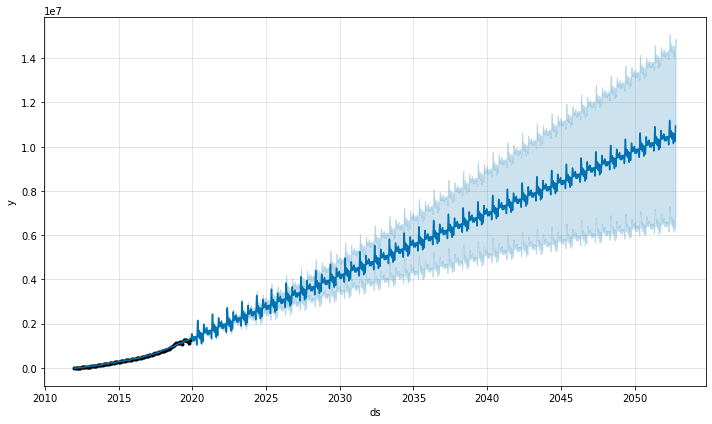

In [39]:
plot1 = m.plot(forecast)

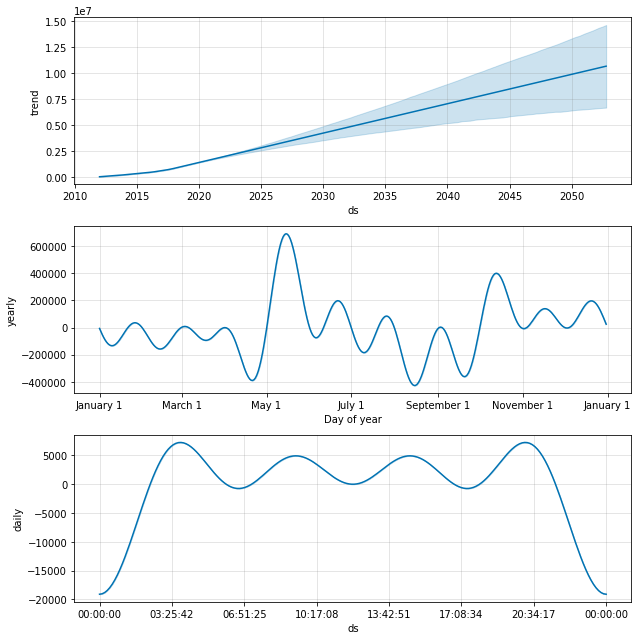

In [40]:
plt2 = m.plot_components(forecast)